### Doğrusal Regresyon (Linear Regression)
Doğrusal regresyon, bağımsız değişkenlerle bağımlı değişken arasında doğrusal bir ilişki olduğunu varsayar ve en iyi uyumu sağlayan bir doğrusal denklem oluşturur:
Amaç: Verilen bağımsız değişkenlerden yola çıkarak bağımlı değişkeni tahmin etmek.
Kullanım Alanı: Reklam harcamalarının satışlara etkisini analiz etmek gibi.

### Lojistik Regresyon (Logistic Regression)
Lojistik regresyon, doğrusal regresyonun sınıflandırma için uyarlanmış bir versiyonudur. Verileri 0 ve 1 gibi iki sınıfa ayırmak için sigmoid fonksiyonunu kullanır:
Amaç: Tahmin edilen değerleri olasılığa dönüştürerek sınıflandırma yapmak.
Kullanım Alanı: Satın alım davranışını tahmin etmek gibi.

### Çapraz Doğrulama (Cross Validation)
Modeli farklı alt kümelerde test ederek genel performansı değerlendirmek için kullanılır. cv parametresi, veri setinin kaç parçaya bölüneceğini belirtir.

### Sınıflandırma Metrikleri
Confusion Matrix: Doğru ve yanlış sınıflandırmaları gösteren bir matristir.
Precision, Recall, F1 Score: Sınıflandırma modelinin doğruluğunu ölçmek için kullanılır.

### Kümeleme (Clustering)
Kümeleme, benzer özelliklere sahip verileri gruplara ayırır. K-Means Kümeleme, her küme için bir merkez noktası tanımlar ve verileri bu merkezlere olan uzaklıklarına göre gruplar.

### Elbow Yöntemi
Elbow yöntemi, ideal küme sayısını belirlemek için kullanılır. Küme sayısı ile hata oranı arasındaki ilişkiyi gösteren bir grafik çizer.

In [ ]:
# Gerekli Kütüphanelerin Yüklenmesi

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # Veri görselleştirme kütüphanesi
import seaborn as sns # Veri görselleştirme kütüphanesi

In [ ]:
# Veri Yükleme ve İnceleme

df = pd.read_csv("https://raw.githubusercontent.com/zaferdemirkol/HerkesIcinYapayZeka/main/Advertising.csv")
df

In [ ]:
# Hedef ve Özellik Değişkenleri Ayırma

X = df.drop('sales',axis=1) # 'sales' bağımlı değişkeni çıkarılır
y = df['sales'] # 'sales' bağımlı değişken olarak atanır

In [ ]:
df['sales'].mean() # Calculate and display the mean of the 'sales' column

14.0225

In [ ]:
# Eğitim ve Test Verilerinin Ayrılması

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# train_test_split: Veriyi %70 eğitim ve %30 test olarak böler.
# random_state: Aynı sonuçları tekrar elde etmek için sabit rastgelelik.

In [ ]:
# Doğrusal Regresyon Modeli Oluşturma ve Çapraz Doğrulama
# Evaluates the model using cross-validation with 5 splits.
# Calculates the mean of the negative mean squared errors.

from sklearn.linear_model import LinearRegression
model=LinearRegression() # Doğrusal regresyon modeli, # Initialize the Linear Regression model
from sklearn.model_selection import cross_val_score # cross_val_score: Modeli farklı veri alt kümelerinde test ederek performansı değerlendirir.
scores = cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error',cv=5) # 5 katlı çapraz doğrulamaa, Perform 5-fold cross-validation
# cv=5: Veriyi 5 parçaya böler ve 5 farklı eğitim/test kombinasyonu ile modeli test eder.
print (scores) # Çapraz doğrulama skorlarını göster - Display cross-validation scores
abs(scores.mean()) #Negatif hata değerlerinin ortalamasını al - Compute and display the mean cross-validation error
# Ortalama hata, modelin genel başarısını anlamaya yardımcı olur.

In [ ]:
# Training and Testing the Linear Regression Model
# Fits the model on training data.
from sklearn.metrics import mean_squared_error
model.fit(X_train,y_train) # Train the model on the training data
y_final_test_pred = model.predict(X_test) # Predict on the test data
mean_squared_error(y_test,y_final_test_pred) # Calculate the mean squared error on the test set

In [ ]:
# Ridge Regression
# Ridge Regression reduces overfitting by adding a penalty proportional to the square of coefficients.
from sklearn.linear_model import Ridge
model = Ridge(alpha=10)  # Ridge Regression model with regularization parameter alpha=10
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)  # Cross-validation
abs(scores.mean())  # Calculate and display the mean cross-validation error

In [ ]:
from sklearn import metrics

In [ ]:
tahminler =       [1,1,0,1,1,0,0,1,1,0]
gercek_degerler = [1,0,0,1,1,1,0,1,0,0]

In [ ]:
df = pd.read_csv("satis_tahmin.csv")

In [ ]:
df

,Yaş,Maaş,Sipariş
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Yaş      400 non-null    int64
 1   Maaş     400 non-null    int64
 2   Sipariş  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yaş,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
Maaş,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Sipariş,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
df['Sipariş'].value_counts()

,count
Sipariş,
0,257
1,143


<Axes: xlabel='Sipariş', ylabel='count'>

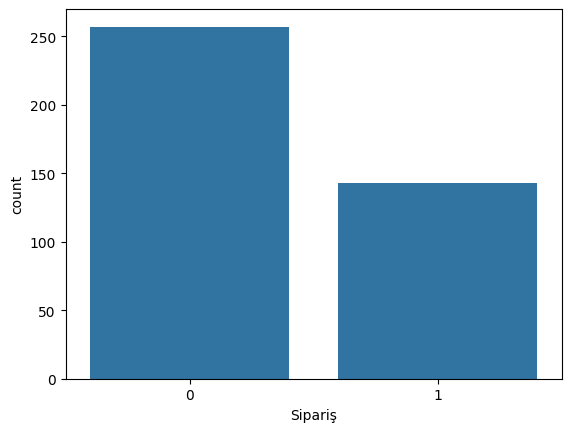

In [ ]:
sns.countplot(data=df,x='Sipariş')

<Axes: xlabel='Sipariş', ylabel='Maaş'>

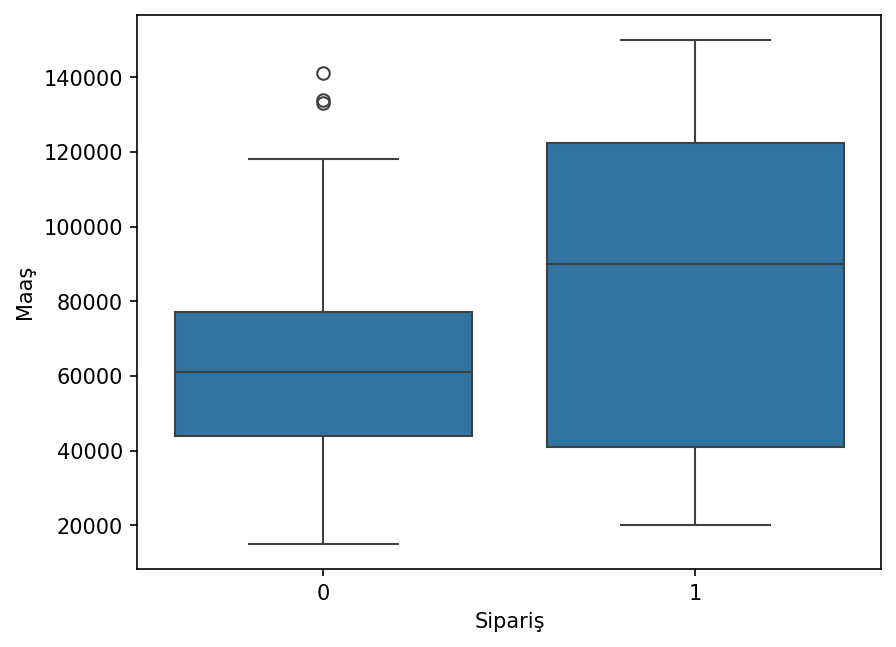

In [ ]:
plt.figure(dpi=150)
sns.boxplot(x='Sipariş',y='Maaş',data=df)

<Axes: xlabel='Sipariş', ylabel='Yaş'>

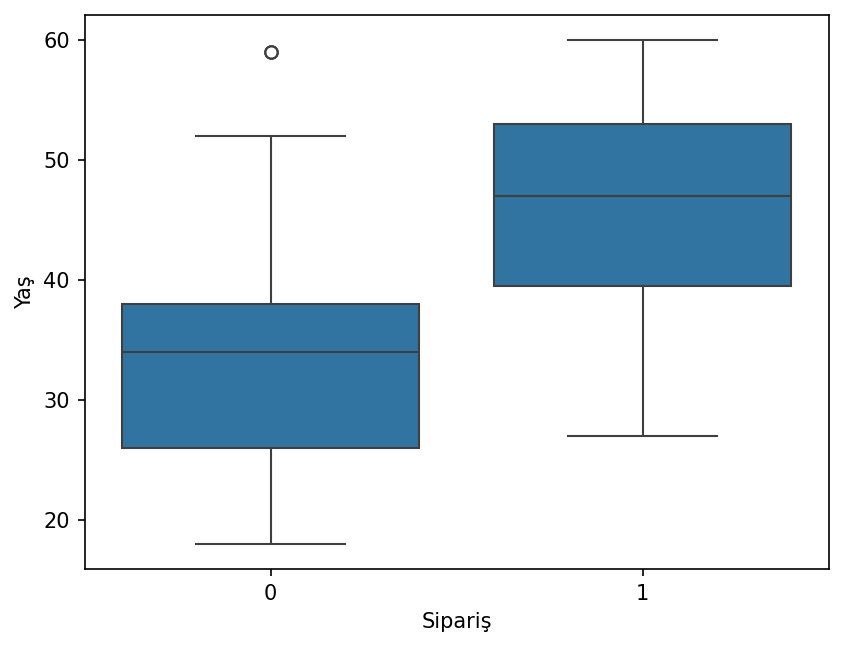

In [ ]:
plt.figure(dpi=150)
sns.boxplot(x='Sipariş',y='Yaş',data=df)

<Axes: xlabel='Yaş', ylabel='Maaş'>

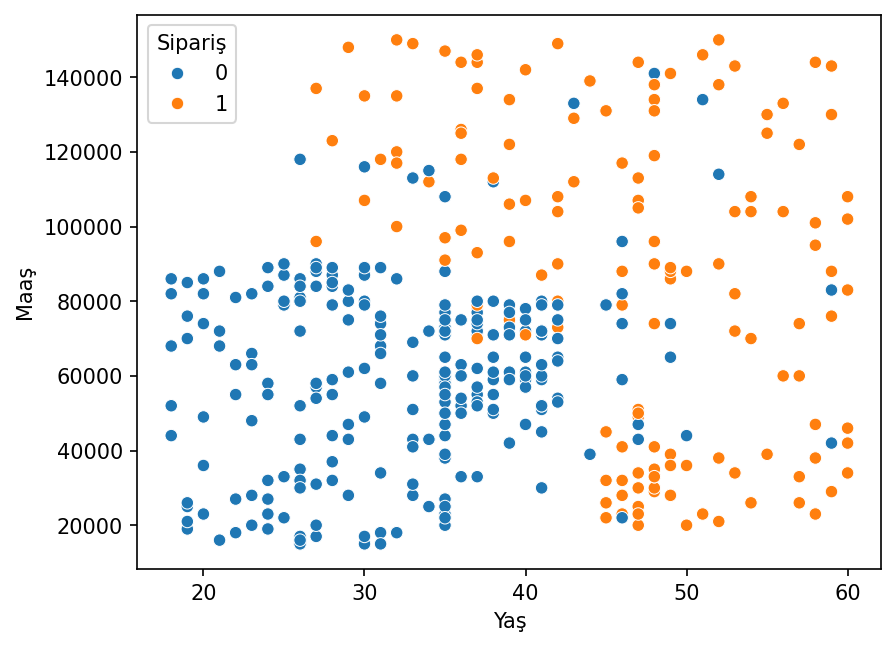

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='Yaş',y='Maaş',data=df,hue='Sipariş')

<Axes: xlabel='Maaş', ylabel='Yaş'>

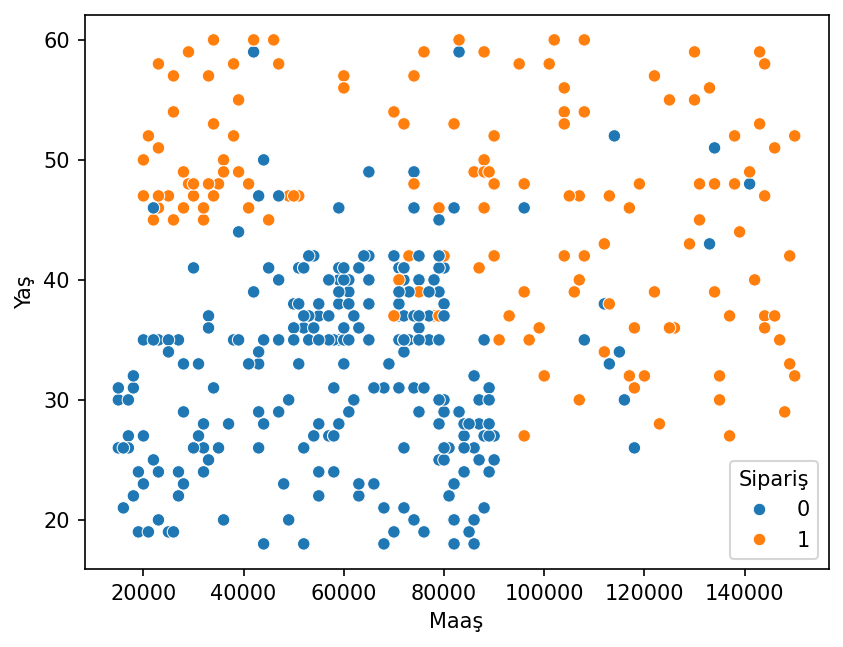

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='Maaş',y='Yaş',data=df,hue='Sipariş')

<Axes: >

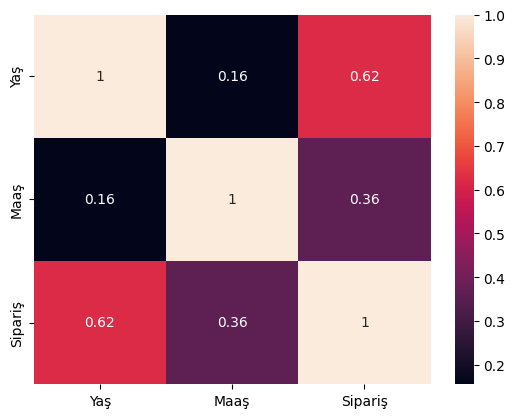

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Yaş', ylabel='Sipariş'>

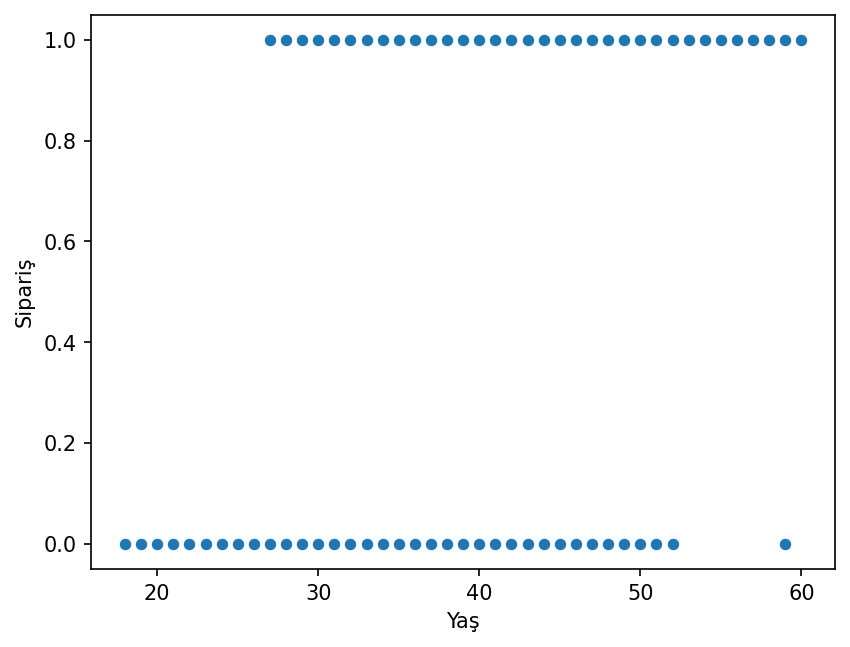

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='Yaş',y='Sipariş',data=df)

<Axes: xlabel='Maaş', ylabel='Sipariş'>

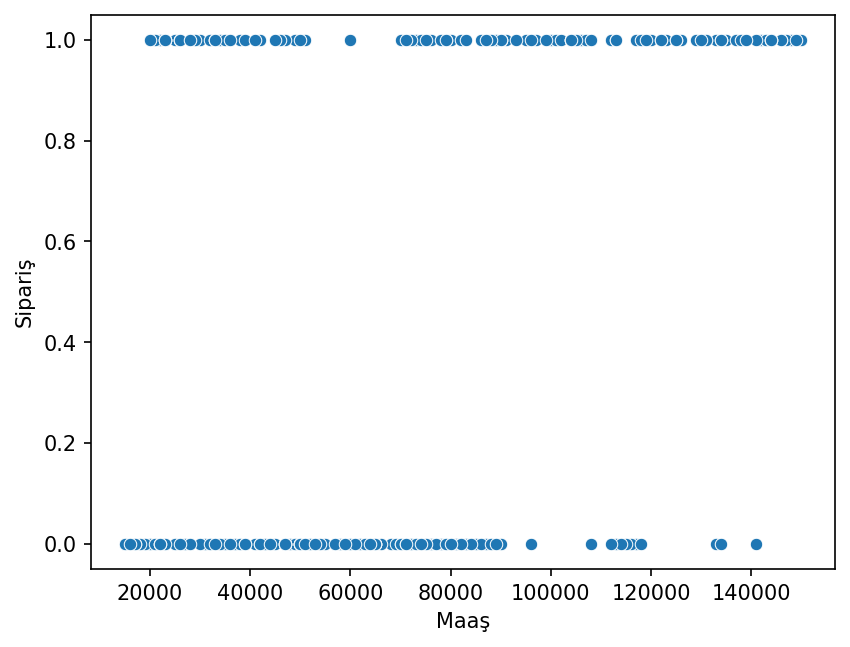

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='Maaş',y='Sipariş',data=df)

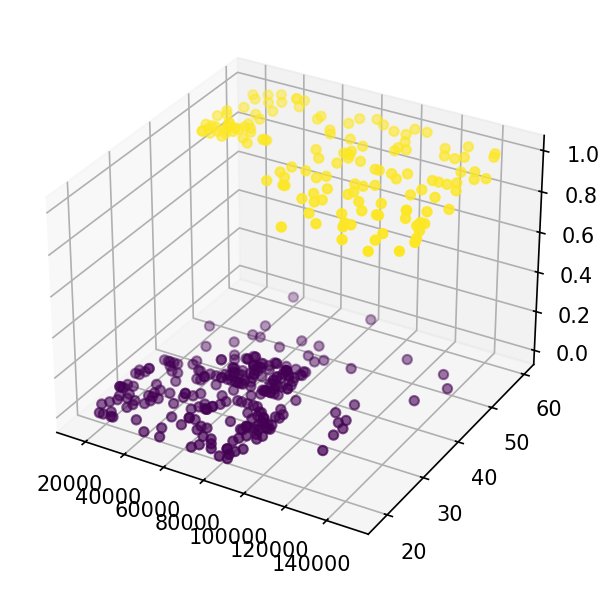

In [ ]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Maaş'],df['Yaş'],df['Sipariş'],c=df['Sipariş'])

In [ ]:
X = df.drop('Sipariş',axis=1)
y = df['Sipariş']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [ ]:
tahminler =       [1,1,0,1,1,0,0,1,1,0]
gercek_degerler = [1,0,0,1,1,1,0,1,0,0]

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [ ]:
tahminler =       [1,1,1,1,1,1,1,1,1,1]
gercek_degerler = [1,1,1,1,1,1,1,1,1,0]

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.90      1.00      0.95         9

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
tahminler =       [1,0,0,1,1,1,0,1,0,0]
gercek_degerler = [1,0,0,1,1,1,0,1,0,0]

In [ ]:
print(metrics.classification_report(gercek_degerler,tahminler))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [ ]:
print(metrics.confusion_matrix(gercek_degerler,tahminler))

[[3 2]
 [1 4]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[22,  5],
       [ 3, 10]])

In [ ]:
32/40

0.8

In [ ]:
accuracy_score(y_test,y_pred)

0.8

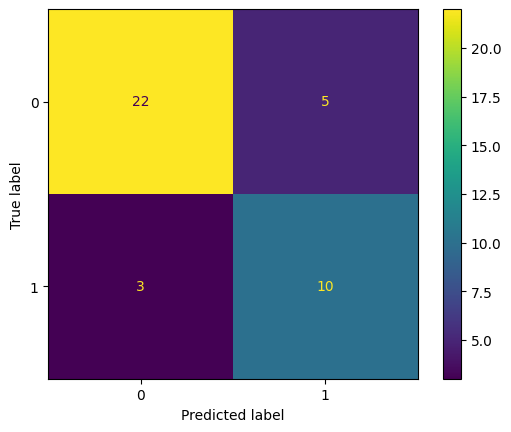

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.67      0.77      0.71        13

    accuracy                           0.80        40
   macro avg       0.77      0.79      0.78        40
weighted avg       0.81      0.80      0.80        40



In [ ]:
m_prob=log_model.predict_proba(scaled_X_test)

In [ ]:
m_prob

In [ ]:
veri2 =[[57,122000]]

In [ ]:
deger = scaler.transform(veri2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
log_model.predict(deger)

array([1])

In [ ]:
log_model.predict_proba(deger)

array([[0.00638182, 0.99361818]])

In [ ]:
from sklearn.metrics import RocCurveDisplay

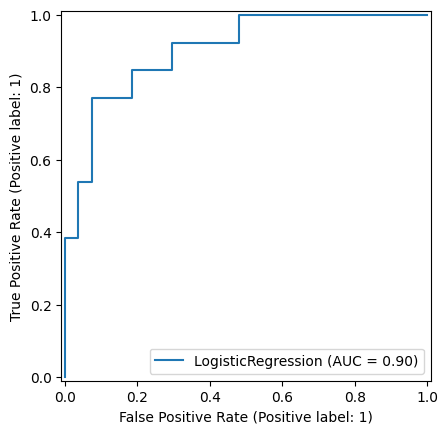

In [ ]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

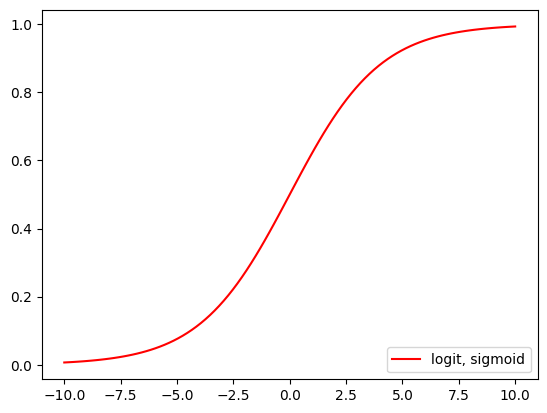

In [ ]:
a = np.linspace(-10, 10, 100)
c = 0.5 * a
b = 1.0 / (1.0 + np.exp(-c))

plt.plot(a, b, 'r-', label='logit, sigmoid')
plt.legend(loc='lower right')

In [ ]:
df = pd.read_csv("meyveler.csv")
df

,agirlik,en,boy,Meyve
0,270,11.0,13.0,Greyfut
1,272,12.0,12.0,Greyfut
2,275,13.0,13.0,Greyfut
3,277,13.0,14.0,Greyfut
4,280,14.0,14.0,Greyfut
5,300,14.0,15.0,Greyfut
6,320,14.0,16.5,Greyfut
7,330,14.0,17.0,Greyfut
8,340,15.0,17.8,Greyfut
9,400,15.0,18.0,Greyfut


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['Meyve'] = le.fit_transform(df['Meyve'])

In [ ]:
df

,agirlik,en,boy,Meyve
0,270,11.0,13.0,0
1,272,12.0,12.0,0
2,275,13.0,13.0,0
3,277,13.0,14.0,0
4,280,14.0,14.0,0
5,300,14.0,15.0,0
6,320,14.0,16.5,0
7,330,14.0,17.0,0
8,340,15.0,17.8,0
9,400,15.0,18.0,0


In [ ]:
X = df[['agirlik', 'en', 'boy']]
y = df['Meyve']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8571428571428571

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[4, 0, 1],
       [0, 5, 0],
       [1, 0, 3]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      1.00      1.00         5
           2       0.75      0.75      0.75         4

    accuracy                           0.86        14
   macro avg       0.85      0.85      0.85        14
weighted avg       0.86      0.86      0.86        14



In [ ]:
df = pd.read_csv("meyveler.csv")

<Axes: xlabel='agirlik', ylabel='boy'>

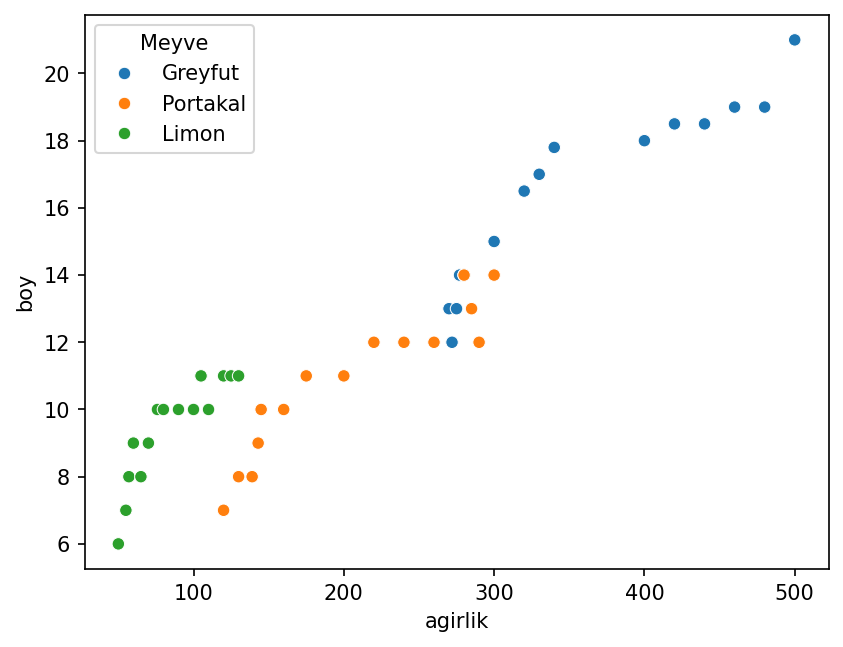

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(x='agirlik',y='boy',data=df,hue='Meyve')

<Axes: xlabel='agirlik', ylabel='en'>

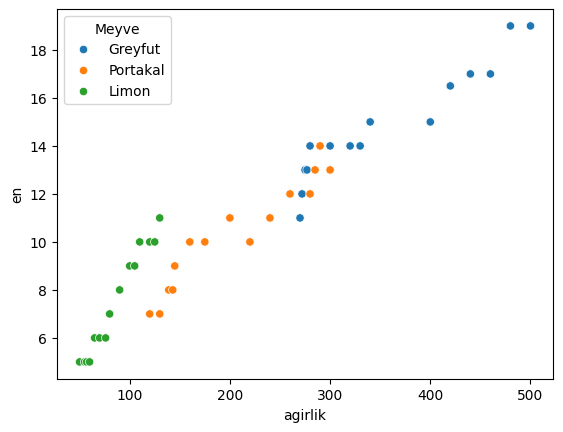

In [ ]:
sns.scatterplot(x='agirlik',y='en',data=df,hue='Meyve')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = {'x': [1, 1.5, 3, 5, 3.5, 4.5, 3.5],
        'y': [1, 2, 4, 7, 5, 5, 4.5]}

df = pd.DataFrame(data)

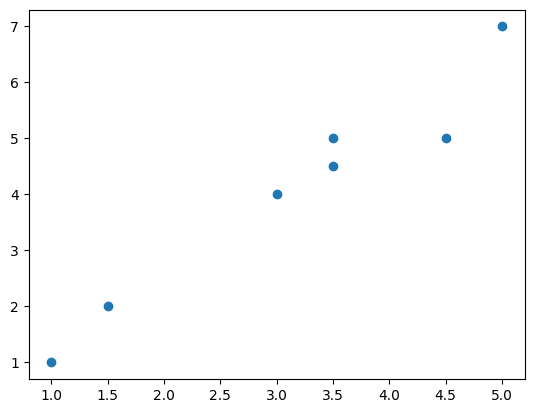

In [ ]:
plt.scatter(df['x'], df['y'])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[3.625, 4.625],
       [1.25 , 1.5  ],
       [5.   , 7.   ]])

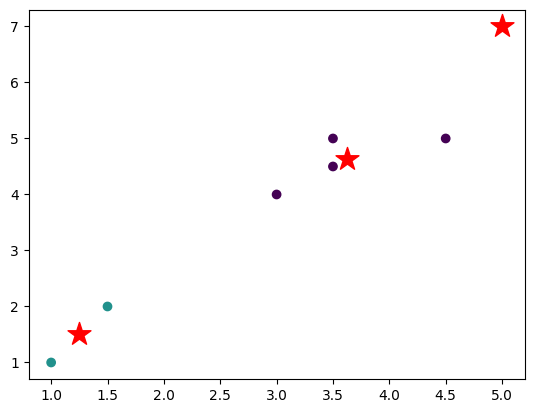

In [ ]:
plt.scatter(df['x'], df['y'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='red')

In [ ]:
data = pd.read_csv("YasVideoIzlemeSayisi.csv")
data

,Yaş,İzleme Sayısı
0,12,12
1,18,15
2,25,35
3,15,19
4,26,45
5,30,12
6,19,14
7,23,47
8,41,6
9,29,15


Text(0, 0.5, 'İzleme Sayısı')

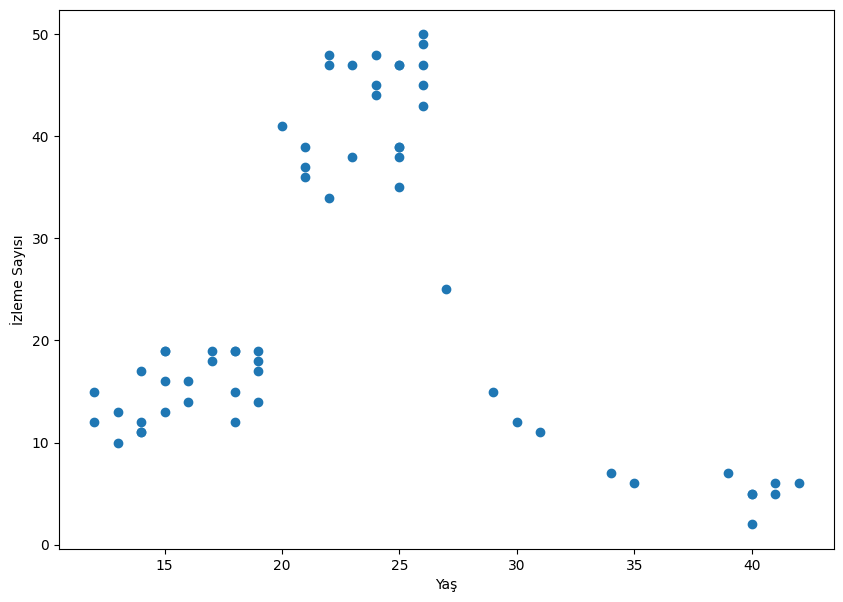

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(data["Yaş"], data['İzleme Sayısı'])
plt.xlabel("Yaş")
plt.ylabel("İzleme Sayısı")

In [ ]:
x = data.copy()
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

Text(0, 0.5, 'İzleme Sayısı')

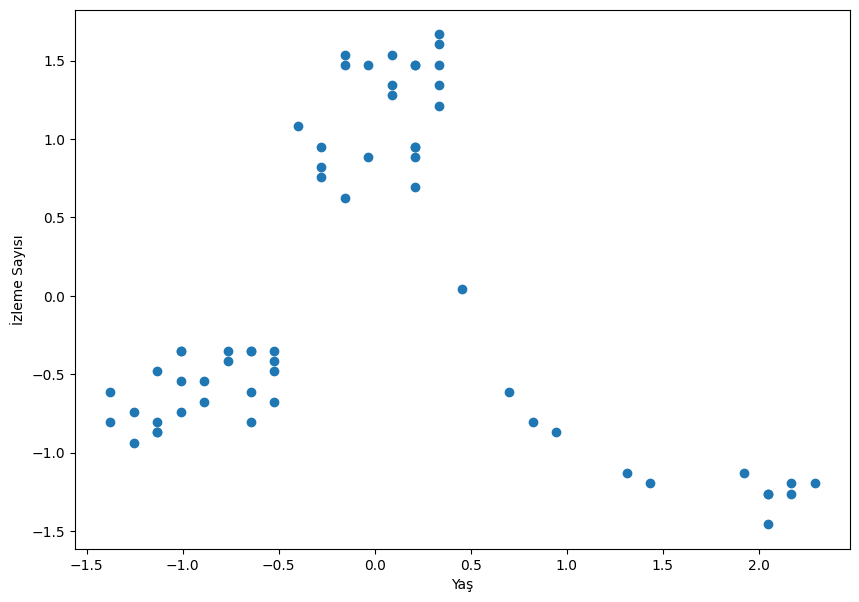

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x_scaled[:,0], x_scaled[:,1] )
plt.xlabel("Yaş")
plt.ylabel("İzleme Sayısı")

In [ ]:
kmeans_new= KMeans(max_iter=300, n_clusters=3)
kmeans_new.fit(x_scaled)

KMeans(n_clusters=3)

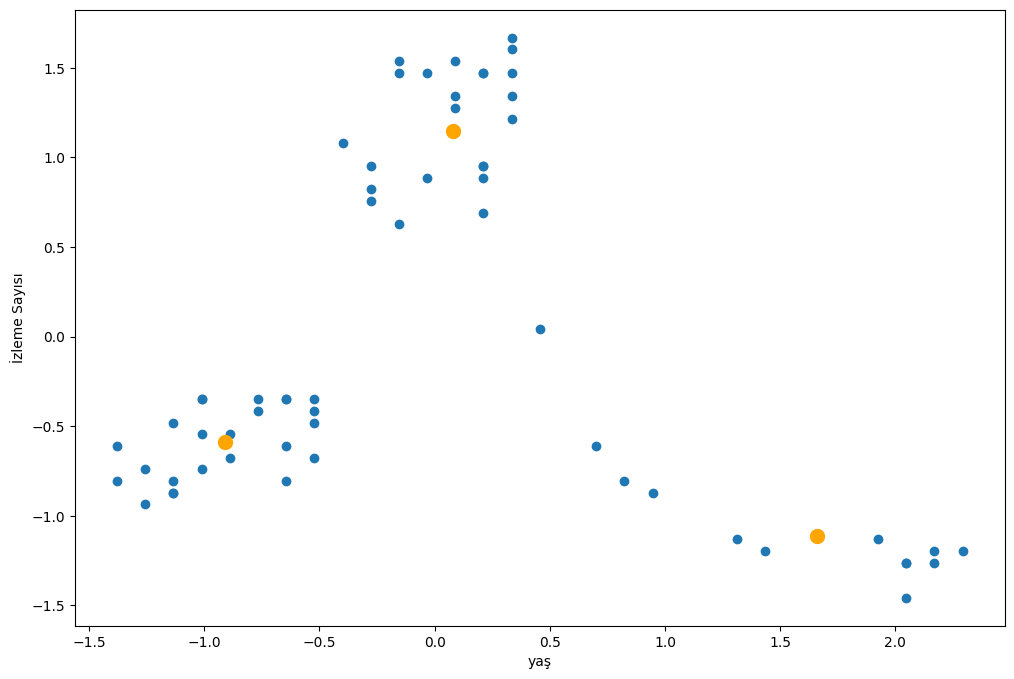

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x_scaled[:,0], x_scaled[:,1])
plt.scatter( kmeans_new.cluster_centers_[:, 0], kmeans_new.cluster_centers_[:, 1], s=100, c='orange')

plt.xlabel("yaş")
plt.ylabel("İzleme Sayısı")
plt.show()

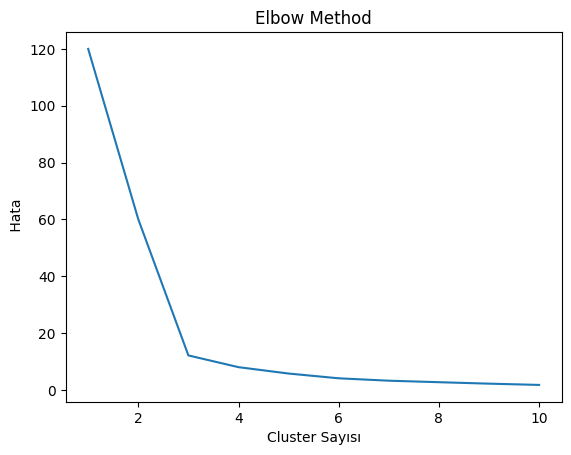

In [ ]:
wcss = []
for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, init='k-means++',
                      max_iter=300, n_init=10, random_state=0)
      kmeans.fit(x_scaled)
      wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Sayısı')
plt.ylabel(' Hata')
plt.show()